# Analise de dados sobre o filme starwas

## importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
from os.path import join
from wordcloud import WordCloud
from ast import literal_eval
from IPython.display import display, Markdown

nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Funções personalizadas

In [2]:
def read_csv(filename):
    folder = "datasets"
    sub_folder = "starwars_4"
    path = join(folder,sub_folder, filename)
    return pd.read_csv(path)

def sentiment_analysis(texto):
    analyse = TextBlob(texto)
    if analyse.sentiment.polarity > 0:
        return "positive"
    elif analyse.sentiment.polarity < 0:
        return "negative"
    else:
        return "neutral"


def clean_word(word):
    word = word.lower().strip(string.punctuation + "’“”‘")
    # Remove qualquer pontuação restante (incluindo no meio da palavra)
    word = ''.join([char for char in word if char not in string.punctuation])
    return word

## Importar dataset e dados gerais dele

In [3]:


df = read_csv("script.csv")
personagens = df["character"].unique()
n_personagens = len(personagens)

print(personagens, n_personagens)

['THREEPIO' 'LUKE' 'IMPERIAL OFFICER' 'VADER' 'REBEL OFFICER' 'TROOPER'
 'CHIEF PILOT' 'CAPTAIN' 'WOMAN' 'FIXER' 'CAMIE' 'BIGGS' 'DEAK' 'LEIA'
 'COMMANDER' 'SECOND OFFICER' 'FIRST TROOPER' 'SECOND TROOPER' 'BERU'
 'OWEN' 'AUNT BERU' 'BEN' 'TAGGE' 'MOTTI' 'TARKIN' 'BARTENDER' 'CREATURE'
 'HUMAN' 'HAN' 'GREEDO' 'JABBA' 'OFFICER CASS'
 'VOICE OVER DEATH STAR INTERCOM' 'OFFICER' 'VOICE' 'GANTRY OFFICER'
 'INTERCOM VOICE' 'TROOPER VOICE' 'FIRST OFFICER' 'WILLARD'
 'DEATH STAR INTERCOM VOICE' 'DODONNA' 'GOLD LEADER' 'WEDGE' 'MAN'
 'RED LEADER' 'CHIEF' 'MASSASSI INTERCOM VOICE' 'RED TEN' 'RED SEVEN'
 'PORKINS' 'RED NINE' 'RED ELEVEN' 'ASTRO-OFFICER' 'CONTROL OFFICER'
 'GOLD FIVE' 'GOLD TWO' 'WINGMAN' 'BASE VOICE' 'TECHNICIAN'] 60


## Núvem de palavras mais faladas no filme

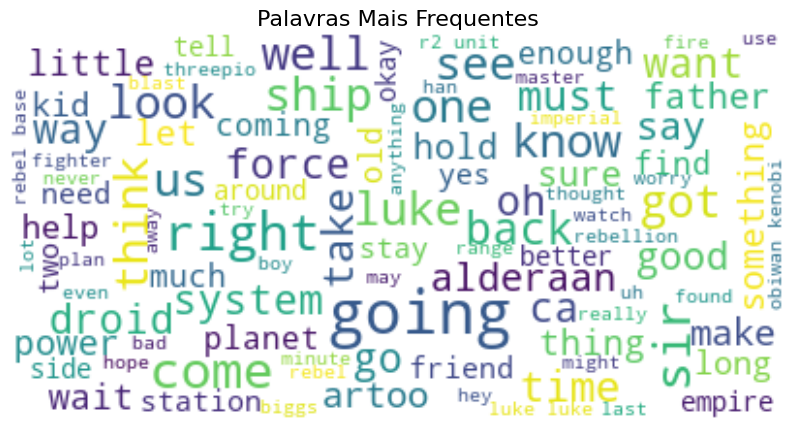

In [4]:
stop_words = set(stopwords.words("english"))
stop_words.update(["you","it", "nt"])


# Processamento robusto com tratamento de erros
words = []
for sentence in df["speech"]:
    try:
        tokens = word_tokenize(str(sentence))  # Garante que seja string
        for word in tokens:
            cleaned = clean_word(word)
            if cleaned and cleaned not in stop_words:
                words.append(cleaned)
    except Exception as e:
        print(f"Erro ao processar: {sentence}\nErro: {e}")


text = " ".join(words)

# Criar a nuvem de palavras
wordcloud = WordCloud(background_color="white", max_font_size=32, min_font_size=8, max_words=100).generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove eixos
plt.title("Palavras Mais Frequentes", fontsize=16)
plt.show()


## Palavras mais faladas

<Axes: >

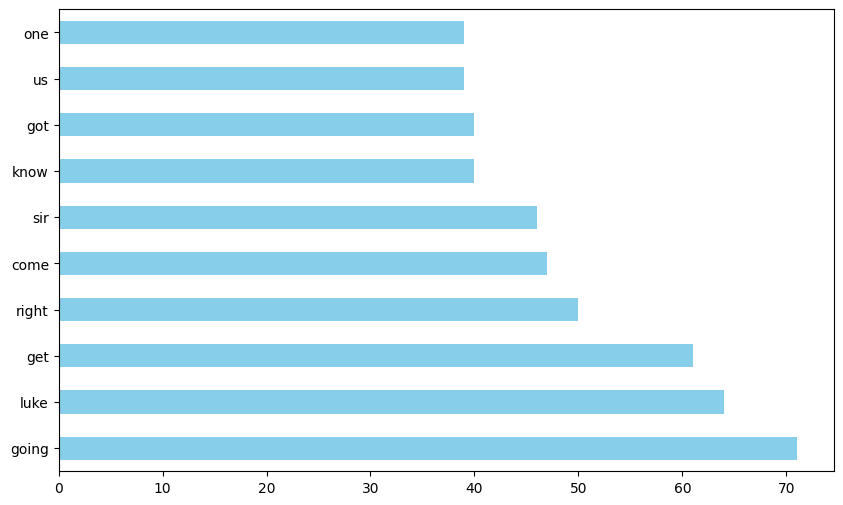

In [5]:
pd.Series(words).value_counts().head(10).plot(kind="barh", figsize=(10, 6), color="skyblue")

O filme teve `n_personagens`os quais são: `personagens`


## top 10 personagens mais participativos no filme

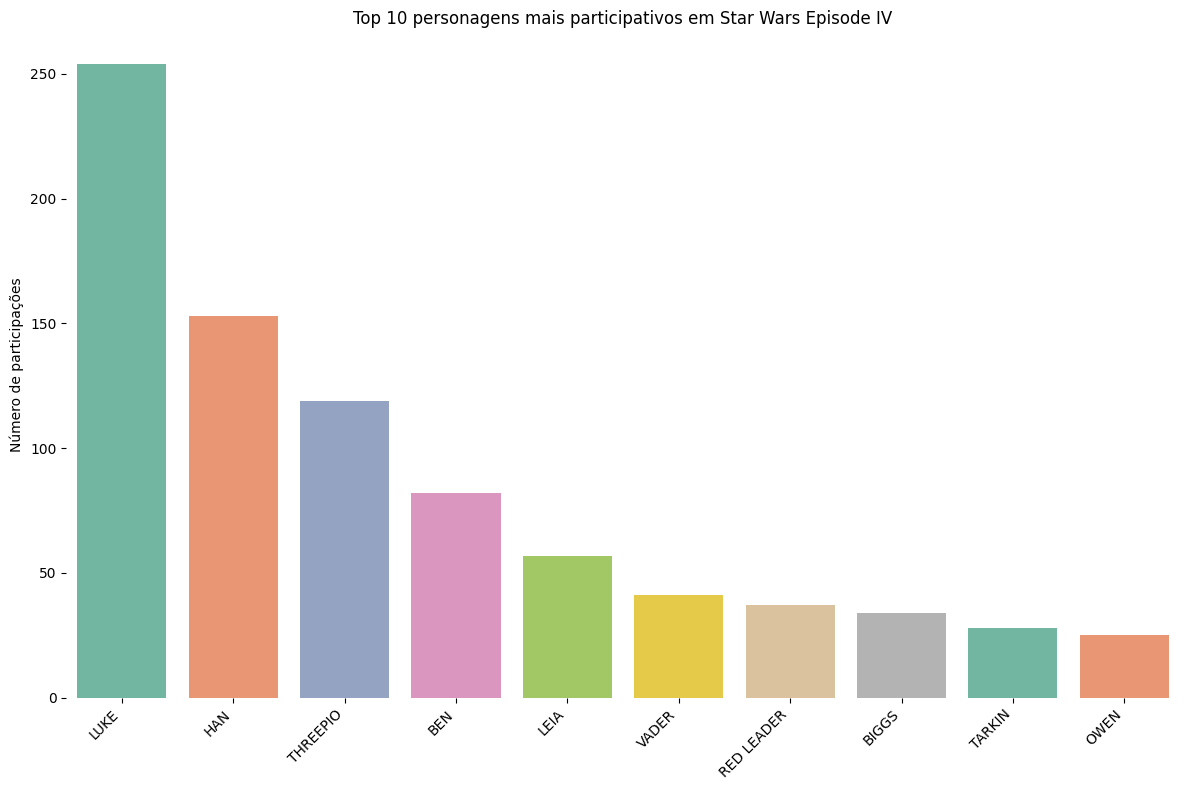

In [6]:
df_plot = df.groupby("character").count().sort_values("speech", ascending=False)
top_10 = df_plot.head(10)

total_participation = df_plot["speech"].sum().item()
top_10_participation = top_10.sum().item()
other_participation = total_participation - top_10_participation

top_10_percentage_participation = round(top_10_participation/total_participation,2)
others_percentage_participation = round(1 -top_10_percentage_participation, 2) 


plt.figure(figsize=(12,8))
sns.barplot(data=top_10, x="character", y="speech", hue="character", dodge=False, palette="Set2")
plt.title("Top 10 personagens mais participativos em Star Wars Episode IV")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.box(False)
plt.ylabel("Número de participações")
plt.tight_layout()
plt.show()

## participação por sexo dos personagens

## Analise dos sentimentos

In [7]:
df_top_10 = df[df["character"].isin(top_10.reset_index()["character"])].copy()
df_top_10["polarity"] = df_top_10["speech"].apply(lambda text: 
TextBlob(text).sentiment.polarity)
df_top_10["subjectivity"] = df_top_10["speech"].apply(lambda text: TextBlob(text).sentiment.subjectivity)
df_top_10_plot_polarity = df_top_10.groupby("character").agg(polarity_mean = ("polarity", "mean"), polarity_sd = ("polarity", "std"), subjectivity_mean = ("subjectivity", "mean"), subjectivity_sd = ("subjectivity", "std")).reset_index()
df_top_10_plot_polarity["polarity_sd"] = df_top_10_plot_polarity["polarity_sd"].fillna(0)
df_top_10_plot_polarity["subjectivity_sd"] = df_top_10_plot_polarity["subjectivity_sd"].fillna(0.5)

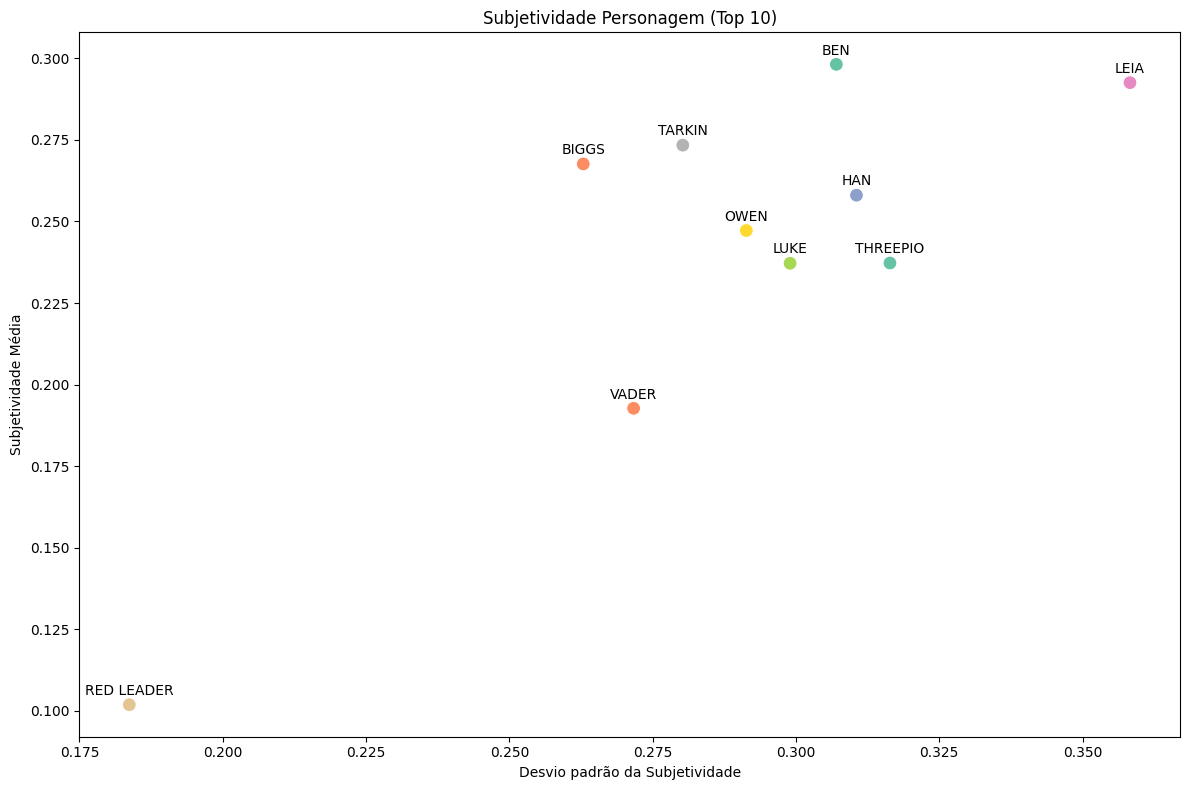

In [8]:
# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df_top_10_plot_polarity,
    x="subjectivity_sd",
    y="subjectivity_mean",
    hue="character",
    palette="Set2",
    s=100  # Tamanho dos pontos
)

for _, row in df_top_10_plot_polarity.iterrows():
    ax.text(row["subjectivity_sd"], row["subjectivity_mean"] + .003, row["character"], fontsize=10, ha="center")

# Melhorar a visualização
plt.title("Subjetividade Personagem (Top 10)")
plt.xlabel("Desvio padrão da Subjetividade")
plt.ylabel("Subjetividade Média")
plt.legend(title="Personagem", bbox_to_anchor=(1.05, 1))  # Mover a legenda para fora
plt.legend().set_visible(False)  # Mover a legenda para fora

plt.tight_layout()  # Ajustar layout para evitar cortes
plt.show()

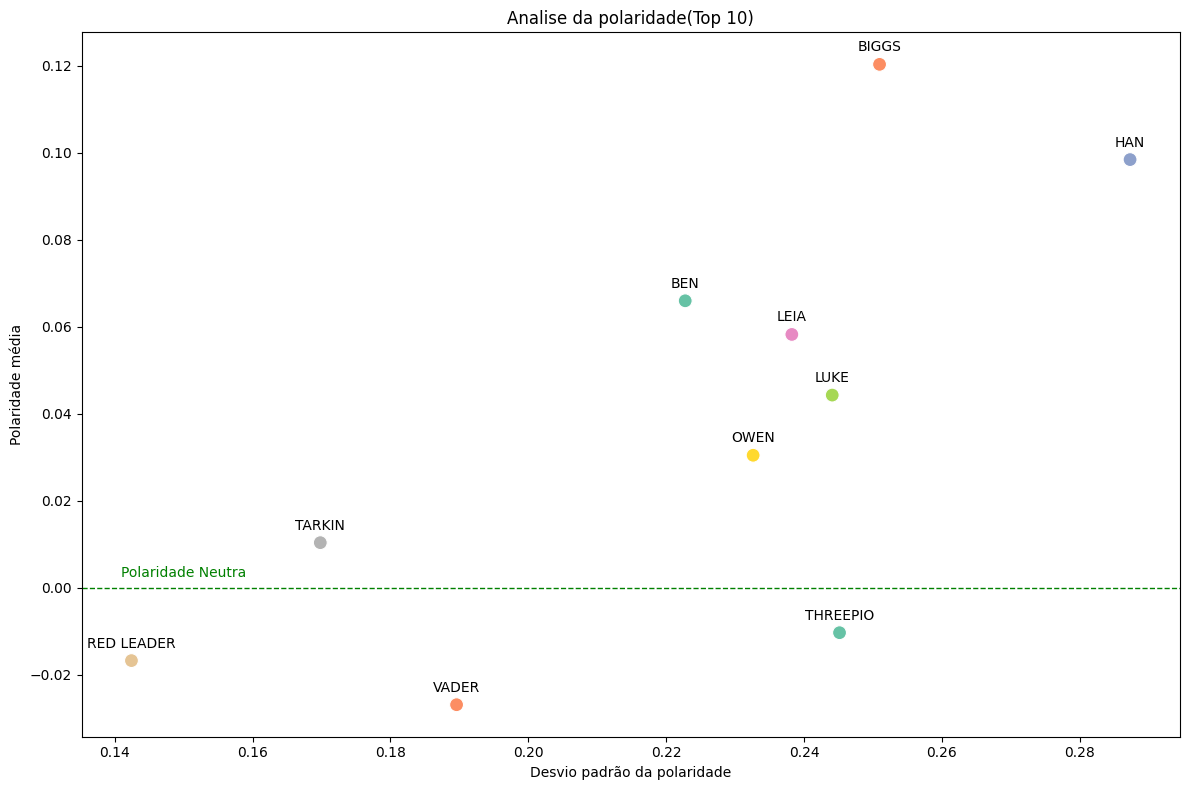

In [9]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df_top_10_plot_polarity, x="polarity_sd", y="polarity_mean", hue="character", palette="Set2", s=100)

for _, row in df_top_10_plot_polarity.iterrows():
    ax.text(x = row["polarity_sd"], y = row["polarity_mean"] + .003, s = row["character"], fontsize=10, ha="center")

ax.text(x = 0.15, y = 0.0025,  s = "Polaridade Neutra", fontsize=10, ha="center", color="green")
plt.axhline(0, color="green", lw=1, ls="--", label="Polaridade Neutra")
plt.title("Analise da polaridade(Top 10)")
plt.xlabel("Desvio padrão da polaridade")
plt.ylabel("Polaridade média")
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

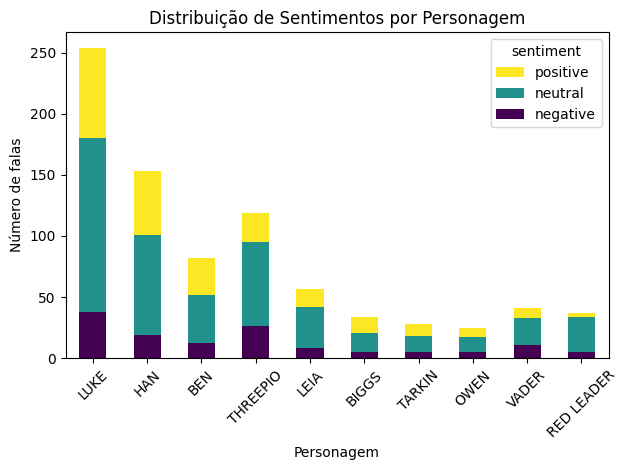

In [10]:
df_top_10["sentiment"] = df_top_10["speech"].apply(sentiment_analysis)

# Contar sentimentos por personagem
sentiment_counts = df_top_10.groupby(["character", "sentiment"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sentiment_counts.sort_values(by="positive", ascending=False).plot(kind="bar", stacked=True, colormap="viridis", legend="reverse")
plt.title("Distribuição de Sentimentos por Personagem")
plt.xlabel("Personagem")
plt.ylabel("Número de falas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Análise por tópicos

## Genero

In [11]:

df_name_versions = read_csv("name_versions.csv")
df_merged = pd.merge(df,df_name_versions,"left","character")
df_characters = read_csv("characters.csv")
df_merged = pd.merge(df_merged, df_characters, "left", left_on="full_name",right_on="name")
df_merged_clean = df_merged[~df_merged["name"].isna()]
df_merged_dirty = df_merged[df_merged["name"].isna()]
personagens_deleted = df_merged_dirty["character"].apply(lambda char: char.capitalize()).unique()
personagens_kept = df_merged_clean["name"].apply(lambda char: char.capitalize()).unique()

In [12]:
df_gender_participations = df_merged_clean.groupby("gender").agg(n=("gender","count")).assign(percentage = lambda col: round(col["n"]/col["n"].sum(), 3))

# {col["gender"]: col["n"]  for row, col in df_gender_participations.iterrows() }
gender_participation_dict = df_gender_participations.to_dict()



In [17]:
df_gender_n = df_merged_clean.groupby("gender").agg(n=("name","nunique"))
df_gender_n.iloc[0].item()

1

In [14]:
for gender in df_merged_clean["gender"].dropna().unique():
    tmp = df_merged_clean[df_merged_clean["gender"]==gender].drop_duplicates("name").loc[:, ["character", "name","gender"]]
    display(Markdown(f"### Genero {gender}"))
    display(tmp)

### Genero male

,character,name,gender
5,LUKE,Luke Skywalker,male
11,VADER,Darth Vader,male
22,CAPTAIN,Raymus Antilles,male
30,BIGGS,Biggs Darklighter,male
102,OWEN,Owen Lars,male
229,BEN,Obi-Wan Kenobi,male
282,TARKIN,Wilhuff Tarkin,male
341,HAN,Han Solo,male
363,GREEDO,Greedo,male
807,WEDGE,Wedge Antilles,male


### Genero female

,character,name,gender
41,LEIA,Leia Organa,female


### Genero hermaphrodite

,character,name,gender
389,JABBA,Jabba Desilijic Tiure,hermaphrodite


<Axes: title={'center': 'Quantidade de personagens por genero'}>

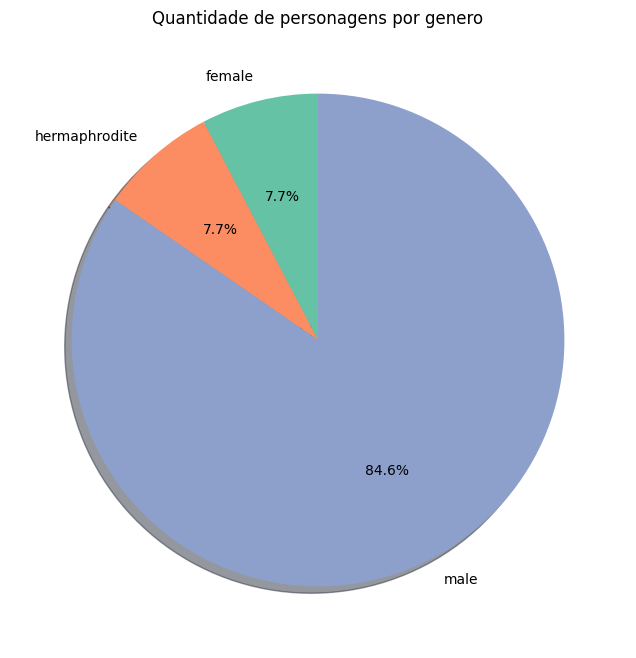

In [52]:
df_gender_n.reset_index().set_index("gender")["n"].plot.pie(ylabel="",
                           autopct='%1.1f%%',
    startangle=90,      
    shadow=True,
     colors=sns.color_palette("Set2") ,
     figsize=(12,8),
     title="Quantidade de personagens por genero")

<Axes: title={'center': 'Participação por gênero'}, ylabel='n'>

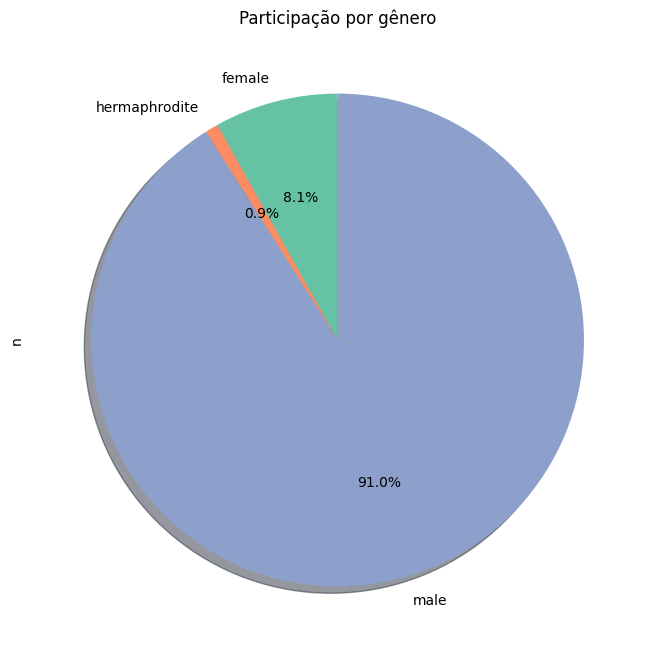

In [50]:
df_gender_participations.reset_index().set_index("gender")["n"].plot.pie(y="", autopct='%1.1f%%',
    startangle=90,      
    shadow=True,
     colors=sns.color_palette("Set2") ,
     figsize=(12,8),
     title="Participação por gênero")

# species

In [ ]:
if isinstance(df_merged_clean["species"].iloc[0],str):
    df_merged_clean.loc[:,"species"] = df_merged_clean["species"].apply(literal_eval)


df_species = read_csv("species.csv").rename(columns={"url":"url_species", "name":"species_name"}).drop(columns=["created","edited","films","people","homeworld"])
#df_species

df_merged_species = pd.merge(left=df_merged_clean.explode(column="species"), right=df_species, how="left" , left_on="species",right_on="url_species")
df_merged_species.groupby("species_name").agg(n=("name","nunique"))

,n
species_name,
Droid,1
Human,11
Hutt,1
Rodian,1
